In [721]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [722]:
Operators = ["+", '-', '*', '/',"^", "sin" , "cos"]
Values = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9]
variable = ['x1' , 'x2']
First_population = 60
Best_choise_num = 5
Other_choise_num = 2
Iteration = 50
Mutation_rate = 0 #From 100%
Mutation_count = 0 #Per gen
Max_tree_depth = 2
copy_Mutation_rate = 10
copy_Mutation_count = 2
max_node = 2 ** Max_tree_depth
Label = "x2 - x1 + 3"
Mutation_rate2 = 50

In [723]:
def function(x1, x2):
    # return (3*(x1**2))+(2*x2)
    # return (3*x1) + (2*x2)
    # return np.sin(3*x1) + (5*x2)
    # return 3*(x1**2) + np.sin(x2)
    return x2 - x1 + 3

In [724]:
# X_train = np.random.randint(1, 200, size=(100, 1))
# y_train = function(X_train[:,0])
# len(X_train)
# y_train

X_train = np.random.uniform(0, 200, size=(100, 2))
y_train = function(X_train[:,0], X_train[:,1])


In [725]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [726]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow(max_depth = self.max_depth)
    
    def printTree (self , node = None):
        if (node == None):
            x = self.to_math_string(self.root)
            
        else:
            x = self.to_math_string(node)
        print (x)
        return x
        

    def grow (self ,max_depth,  depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child = random.choice(Values)
                else:
                    child = random.choice(variable)
                temp_node = Node (operator=temp_op, children=[child])
                temp_node.isLeaf = True
                return temp_node
            else :
                randomOp = random.randint(0,10)
                if (randomOp >= 7):
                    child1 = random.choice(Values)
                else:
                    child1 = random.choice(variable)
                
                randomOp = random.randint(0,10)
                if (randomOp >= 7):
                    child2 = random.choice(Values)
                else:
                    child2 = random.choice(variable)
                temp_node = Node (operator= temp_op , children=[child1,child2])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( max_depth , depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow (max_depth, depth= depth + 1 )
                right_node = self.grow (max_depth, depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val1 , val2):
        return self.calculator ( self.root , val1 , val2)


    def calculator (self , node , val1 , val2):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    if (node.children[0] == "x1"):
                        node.value = self.SinCosOp (node , val1)
                    elif (node.children[0] == "x2"):
                        node.value = self.SinCosOp (node , val2)
                    else :
                        node.value = self.SinCosOp (node , node.children[0])
                    # return node.value
                else :
                    if (node.children[0] == "x1"):
                        if (node.children[1] == "x1"):
                            node.value = self.OtherOp (node , val1 , val1)
                        elif (node.children[1] == "x2"):
                            node.value = self.OtherOp (node , val1 , val2)
                        else:
                            node.value = self.OtherOp (node , val1 , node.children[1])

                    elif (node.children[0] == "x2"):
                        if (node.children[1] == "x2"):
                            node.value = self.OtherOp (node , val2 , val2)
                        elif (node.children[1] == "x1"):
                            node.value = self.OtherOp (node , val2 , val1)
                        else:
                            node.value = self.OtherOp (node , val2 , node.children[1])
                    
                    else :
                        if (node.children[1] == "x1"):
                            node.value = self.OtherOp (node , node.children[0] , val1)
                        elif (node.children[1] == "x2"):
                            node.value = self.OtherOp (node , node.children[0] , val2)
                        else:
                            node.value = self.OtherOp (node , node.children[0] , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val1 , val2)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val1 , val2)
                    temp_val2 = self.calculator(node.children[1], val1, val2)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp(self, node, val1, val2, flag=False):
        if flag:
            return
        if node.operator == "+":
            result = val1 + val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "-":
            result = val1 - val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "*":
            result = val1 * val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "/":
            if val2 == 0:
                flag = True
                return 1
            # Convert val1 and val2 to float to avoid overflow errors
            result = float(val1) / float(val2)
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "^":
            if val1 == 0 and val2 < 0:
                return 1
            else:
                if val2 == 0:
                    return 1
                x = 1
                i = 1
                while not flag and i <= val2:
                    x = x * val1
                    i += 1
                    if x > 10000 or x < -10000:
                        flag = True
                        return 1000
                return x



    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node
        
    def depth_calculator (self , node , depth = 1 , max_depth = 1):
        if (node.isLeaf == True):
            if (depth > max_depth):
                return depth
            else:
                return max_depth
        else:
            for child in node.children :
                max_depth = self.depth_calculator (child , depth+1 , max_depth)
            return max_depth


In [727]:
def Create_tree ():
    my_tree = Tree(random.randint(1 , Max_tree_depth))
    my_tree.create()
    return my_tree


In [728]:
treeList = []
for i in range (First_population):
    treeList.append(Create_tree())
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0] , X_train[i][1])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

(8 - 1)
(sin(x1) / (x2 / x2))
sin(((x2 ^ x1) + cos(0)))
((9 / 2) ^ (3 - x2))
sin(2)
(x1 - x2)
((sin(1) * sin(6)) - ((2 * x2) - (6 - 0)))
(sin(x2) / (3 ^ x1))
(cos((2 / x2)) ^ ((x2 * 5) / cos(5)))
(sin(4) - (x1 ^ x1))
(1 - x1)
sin((x1 * x1))
(cos((x2 - 3)) - (cos(2) * (4 - x2)))
(((x1 + x2) / (x2 - x1)) - (sin(x2) ^ cos(1)))
((x1 * x1) * (x2 ^ x2))
sin(((x2 ^ x2) ^ (0 - x2)))
(((5 - 1) - cos(4)) * cos(x1))
((x2 - x2) ^ (9 / 2))
(x2 - x1)
(sin(9) ^ cos(x2))
(x1 + x2)
((5 / x1) ^ (sin(2) ^ (x2 / 8)))
(x1 ^ 1)
cos(sin(x2))
cos(((x1 - 2) + (x2 * 2)))
cos((sin(6) - cos(x2)))
(sin(x1) * (x1 ^ x1))
sin((8 + 7))
cos(x1)
(sin(sin(2)) + (x1 ^ x1))
(0 / 8)
(cos((x1 * x1)) / cos(cos(x2)))
((4 * x1) ^ (6 - 6))
(sin(9) * (x1 / x1))
(((0 + x2) ^ cos(8)) ^ (cos(8) ^ sin(6)))
sin(sin((x1 + x1)))
(x2 * x2)
(cos(cos(x1)) - sin((x2 * 0)))
(0 + 4)
(cos(x1) + (x2 * x1))
((x1 * x2) * (x1 ^ 3))
(((x2 + 8) ^ cos(x1)) * ((3 ^ 6) * (x2 / x1)))
((0 / x2) ^ (x2 ^ x1))
((5 + 9) * sin((x2 ^ x1)))
(x2 * x1)
((x2 - x2)

In [729]:
def Mutation (arr):
    for tree in arr :
        ran = random.randint (1 , 100)
        if (ran <= Mutation_rate2):
            # tree.printTree()
            nodes = tree.TreeToList()
            randNode  = random.choice(nodes)
            # tree.printTree(randNode)
            depth = tree.depth_calculator(randNode)
            # print (depth)
            tempNode = copy.deepcopy(tree.grow(depth-1))
            depth1 = tree.depth_calculator(tempNode)
            # print ( depth1)
            # tree.printTree(tempNode)
            tree.ReplaceNode (randNode , tempNode)
            # tree.printTree()
            # print("--------------")
        

In [730]:
avg = []
best = []
n = 0
for i in range (Iteration):

    bestTrees = []
    otherTrees = []

    #Find the best MSEs
    bestTreesIndex = mseTree.argsort()[:Best_choise_num]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    
    #Create new gen from best trees and others
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])


    for j in range (len(other_idx)):
        otherTrees.append(treeList[other_idx[j]])
    random_elements = random.sample(otherTrees, Other_choise_num)
    for element in random_elements :
         bestTrees.append(element)

    # Mutation

    if (len(avg) > 2):
        if avg[-1] == 0 :
            break
        tempDiff = abs(avg[-2] - avg[-1])
        # print ("temp diff : " , tempDiff)
        if (tempDiff == 0):
            tempScale = 200
        else:
            tempScale = avg[-1] / tempDiff
        # if ( avg[-1]<1):
        #     n=0
        #     Mutation_rate = 0
        #     Mutation_count = 0
        if (tempScale > 100):
            # print (avg[-1])
            # print ("&&&&&&&")
            # print (" the n is :" , n)
            n +=1
            Mutation_rate = copy_Mutation_rate * n
            Mutation_count = copy_Mutation_count * n
        else :
            n=0
            Mutation_rate = copy_Mutation_rate
            Mutation_count = copy_Mutation_count

    tempRate = random.randint(1,100)
    if (tempRate <= Mutation_rate):
        # print (Mutation_count)
        for j in range (Mutation_count):
            tempTree = Create_tree()
            bestTrees.append(tempTree)
            # print ("!!!!!!!!")
            # print (i)
            # tempTree.printTree()
        # Mutation (treeList)
    



    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):
            flag = True
            
            for i in range (10):
                temp1 = copy.deepcopy(bestTrees[j])
                temp2 = copy.deepcopy(bestTrees[k])

                nodes1= temp1.TreeToList()
                nodes2 = temp2.TreeToList()

                # print (str(len(nodes1)) + " || " + str(len(nodes2)))

                select1 = random.choice (nodes1)
                select2 = random.choice (nodes2)

                # print ("Before change")
                # temp1.printTree()
                # temp2.printTree()

                # print ("Selected Nodes:")
                # temp1.printTree(select1)
                # temp2.printTree(select2)

                temp1.ReplaceNode (select1 , select2)
                temp2.ReplaceNode (select2 , select1)

                list1= temp1.TreeToList()
                list2= temp2.TreeToList()

                if (len(list1) <= max_node and len(list2) <= max_node):
                    break
                # print ("After change")
                # temp1.printTree()
                # temp2.printTree()
                # print (str(len(list1)) + " || " + str(len(list2)))

            # print ("---------------------")


            treeList.append(temp1)
            treeList.append(temp2)
                
                # print ("Child created!")
                # print ("-----------------------------------------------------------")

    # tempRate = random.randint(1,100)
    # if (tempRate <= Mutation_rate):
    #     # print (Mutation_count)
    #     # for j in range (Mutation_count):
    #     #     tempTree = Create_tree()
    #     #     bestTrees.append(tempTree)
    #     #     # print ("!!!!!!!!")
    #     #     # print (i)
    #     #     # tempTree.printTree()
    #     Mutation (treeList)

    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0], X_train[j][1])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:Best_choise_num]
    # avg.append(mean (lowest_five))
    temp_avg = round((sum(lowest_five) / len(lowest_five)) , 2)
    avg.append(temp_avg)
    best.append (sorted_list[0])
    print (temp_avg)
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:Best_choise_num]
bestTreesIndex = mseTree.argsort()[:Best_choise_num]


for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

print ("------------------------------------------")

print ("Best MSE: " , sorted_list[0])
print ("Best Tree: ")
treeList[bestTreesIndex[0]].printTree()


971.0
9.0
9.0
9.0
9.0
9.0
9.0
8.87
7.95
4.63
4.0
3.4
1.11
0.2
0.0
(((x2 - x1) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))
((cos(7) ^ cos(7)) + (((cos(x1) + (x2 ^ 3)) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))
((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))
(((1 ^ x1) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))
((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))
------------------------------------------
Best MSE:  0.0
Best Tree: 
(((x2 - x1) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))


'(((x2 - x1) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))'

(((x2 - x1) ^ cos(7)) + ((cos(7) ^ cos(7)) + ((cos(7) ^ cos(7)) + (x2 - x1))))


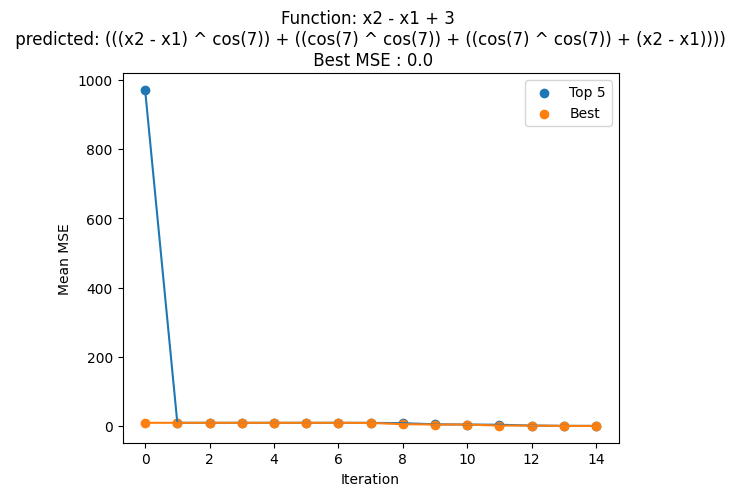

In [731]:
fig, ax = plt.subplots()

ax.scatter(range(len(avg)), avg)
ax.scatter(range(len(best)) , best)

plt.legend(["Top 5", "Best"])



ax.plot(range(len(avg)), avg, '-')
ax.plot(range(len(best)), best, '-')
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean MSE')
# plt.title('function')
# ax.set_title(f"{treeList[bestTreesIndex[0]].printTree()}")
ax.set_title(f"Function: {Label} \n predicted: {treeList[bestTreesIndex[0]].printTree()} \n Best MSE : {sorted_list[0]}")
# ax.set_title(Label)

plt.show()